### OpenCV의 이미지와 영상 처리

* Python에서 사용되는 여러 image라이브러리를 간단히 살펴보고 OpenCV와의 차이 이해
* OpenCV의 단일 이미지 처리 방식 이해 
* OpenCV의 비디오 영상 처리 방식 이해

#### OpenCV 이미지 처리 이해 및 타 패키지 비교

#### PIL 패키지를 이용하여 이미지 로드하기

image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


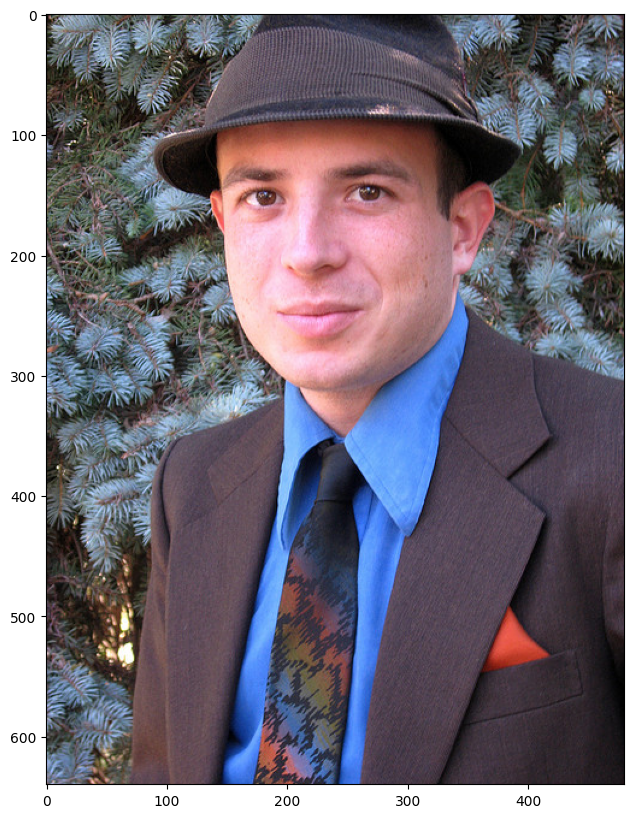

In [1]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

from PIL import Image

# PIL은 oepn()으로 image file을 읽어서 ImageFile객체로 생성.  
pil_image = Image.open('data/sample1.jpg')
print('image type:', type(pil_image))

plt.figure(figsize=(10, 10))
plt.imshow(pil_image)
plt.show()

#### OpenCV로 이미지 로드하기
* OpenCV는 imread()를 이용하여 원본 RGB 이미지를 BGR 형태의 넘파이 배열로 반환함.  
* OpenCV의 imwrite()를 이용한다면 BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB형태로 변환하므로 사용자는 RGB->BGR->RGB 변환에 신경쓰지 않아도 됨. 

cv_image type: <class 'numpy.ndarray'>  cv_image shape: (640, 480, 3)


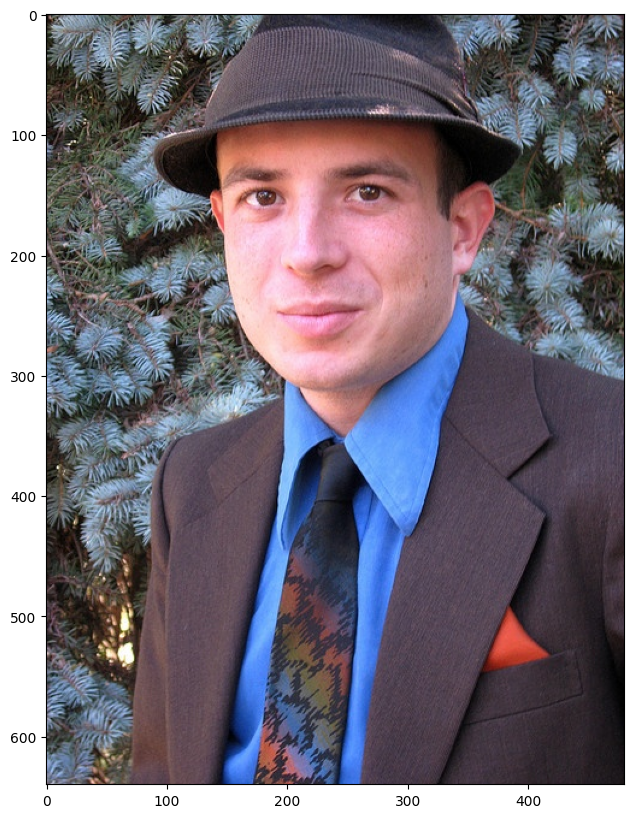

In [2]:
import cv2

cv2_image = cv2.imread('data/sample1.jpg')
cv2.imwrite('data/sample1_copy.jpg', cv2_image)
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

plt.figure(figsize=(10, 10))
img = plt.imread('data/sample1_copy.jpg')
plt.imshow(img)
plt.show()


#### OpenCV의 imread()로 반환된 BGR 이미지 넘파이 배열을 그대로 시각화 하기
* OpenCV의 imread()는 RGB를 BGR로 변환하므로 원하지 않는 이미지가 출력됨

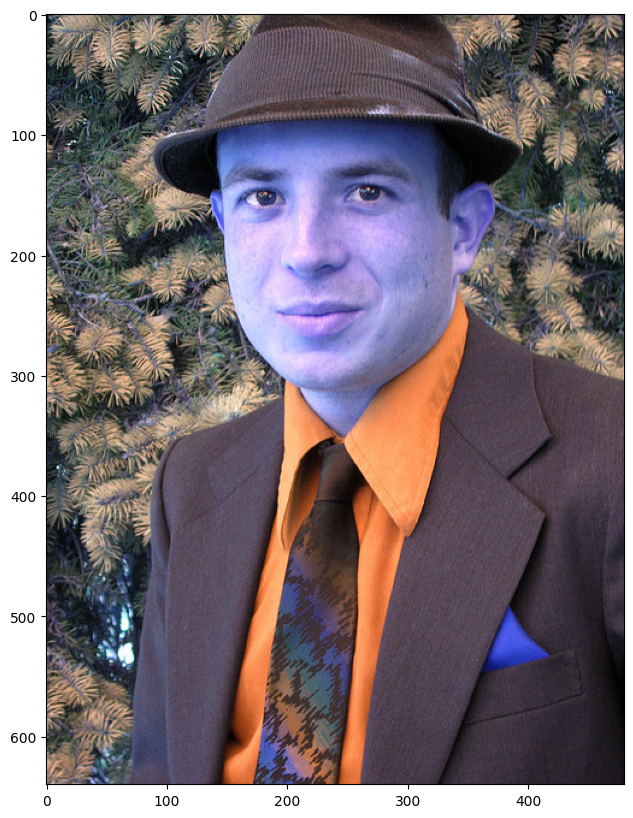

In [3]:
cv2_image = cv2.imread('data/sample1.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(cv2_image)
plt.show()

In [4]:
cv2_image = cv2.imread('data/sample1.jpg')
print(type(cv2_image))
print(cv2_image.shape)
cv2_image[:, :, 0]

<class 'numpy.ndarray'>
(640, 480, 3)


array([[ 48,  13,  32, ...,  32,  24,  27],
       [ 52,  19,  54, ...,  53,  47,  60],
       [ 35,   0, 102, ...,  84,  63,  78],
       ...,
       [152, 169, 133, ...,  23,  23,  26],
       [145, 127, 116, ...,  23,  23,  24],
       [146,  97, 112, ...,  23,  22,  19]], dtype=uint8)

In [5]:
cv2_image[:, :, 2]

array([[ 54,  41,  63, ...,  56,  54,  51],
       [ 63,  26,  91, ...,  72,  64,  59],
       [ 60,   0, 150, ..., 100,  72,  67],
       ...,
       [158, 140, 100, ...,  26,  27,  32],
       [157, 129,  96, ...,  27,  29,  31],
       [144, 127, 109, ...,  27,  29,  26]], dtype=uint8)

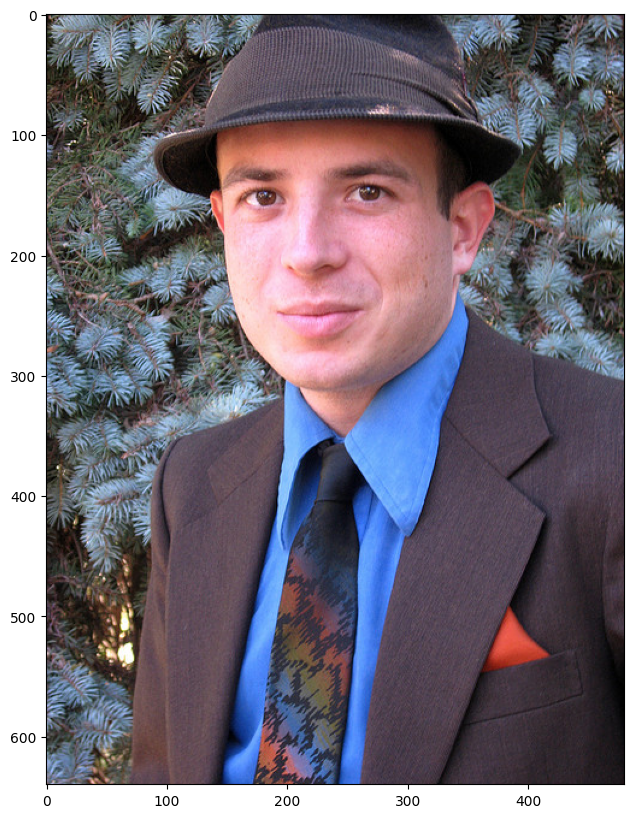

In [6]:
cv2_image = cv2.imread('data/sample1.jpg')
draw_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(draw_image)
plt.show()

#### OpenCV 영상처리
* OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API를 제공
* VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공

In [7]:
import cv2

video_input_path = 'data/sample1.mp4'

cap = cv2.VideoCapture(video_input_path)

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #(200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 갯수: 1168 FPS: 24 Frame 크기: (1024, 768)


In [9]:
import time
from PIL import Image
import IPython.display as display

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start = time.time()
index=0
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')
    
    clone = img_frame.copy()
    clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
    clone = cv2.resize(clone,(640,440))
    cv2.rectangle(clone, (300, 100, 500, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(clone, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)    
    display.clear_output(wait=True)
    display.display(Image.fromarray(clone))
    
print('write 완료 시간:', round(time.time()-start,4))
cap.release()   

KeyboardInterrupt: 